In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
vectors = pd.read_feather('data/1m.ftr')
corr = vectors.corr()
vectors.shape

(473641, 40)

### Plot Correlation Matrix 

In [3]:
def triangle_map(corrmat):
    fig, ax = plt.subplots(figsize=(12,12))
    df_lt = corrmat.where(np.tril(np.ones(corrmat.shape)).astype(np.bool))
    sns.heatmap(df_lt, cmap='binary', square=True)
    plt.show()

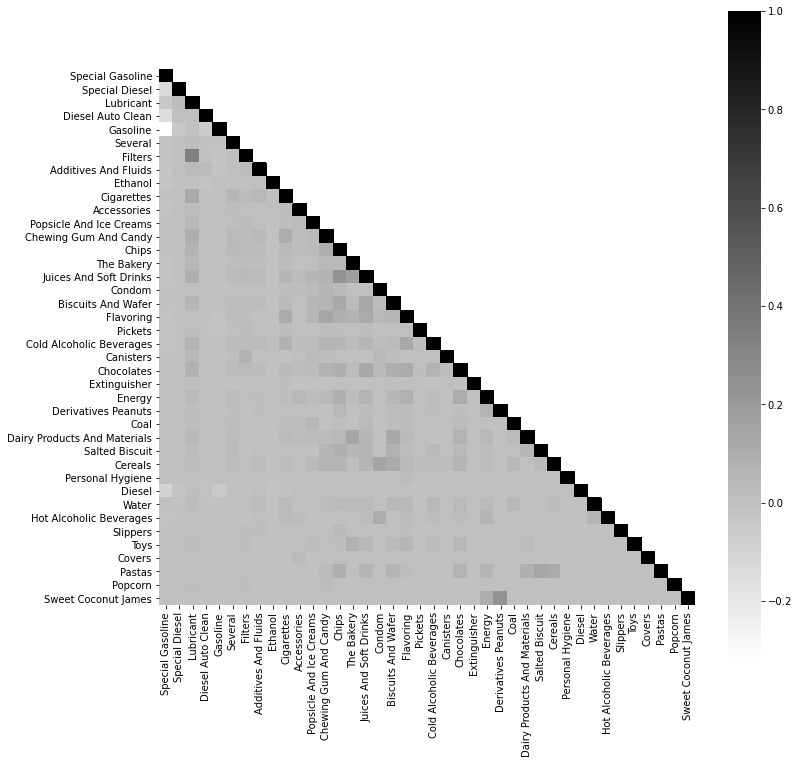

In [4]:
triangle_map(corr)

### Make Graph

In [5]:
# Distance function to transform matrix
def dfunc(cell):
        return np.sqrt(2 * (1 - cell))

In [6]:
# Generates an encoded dictionary mapping each 
# node to an encoded value for each product
def make_labels(vec_df, limit=None):
    # Get columns and restrict if specified
    cols = vec_df.columns
    cols = cols[:limit] if limit else cols
    
    # Encode each label
    le = LabelEncoder()
    encoded = le.fit_transform(cols)
    
    # Generate a dict mapping each node to a label
    labels = {i:encoded[i] for i in range(len(cols))}
    
    # Make a legend for products and encodings
    legend = list(zip(encoded, vectors.columns))
    # Sort the legend for ease of use
    legend.sort()
    
    # Generate a dict mapping each node to a label
#     labels = {}
#     for i in range(len(cols)):
#         labels[i] = encoded[i]
    
    return labels, legend

In [7]:
def draw(G, pos, ax, node_color='c', node_size=400, width=1, edge_color='0.25', font_size=15):
    nx.draw_networkx_nodes(G, pos, ax=ax, node_color=node_color, node_size=node_size)
    nx.draw_networkx_edges(G, pos, ax=ax, width=width, edge_color=edge_color)
    nx.draw_networkx_labels(G, pos, labels, ax=ax, font_size=font_size)

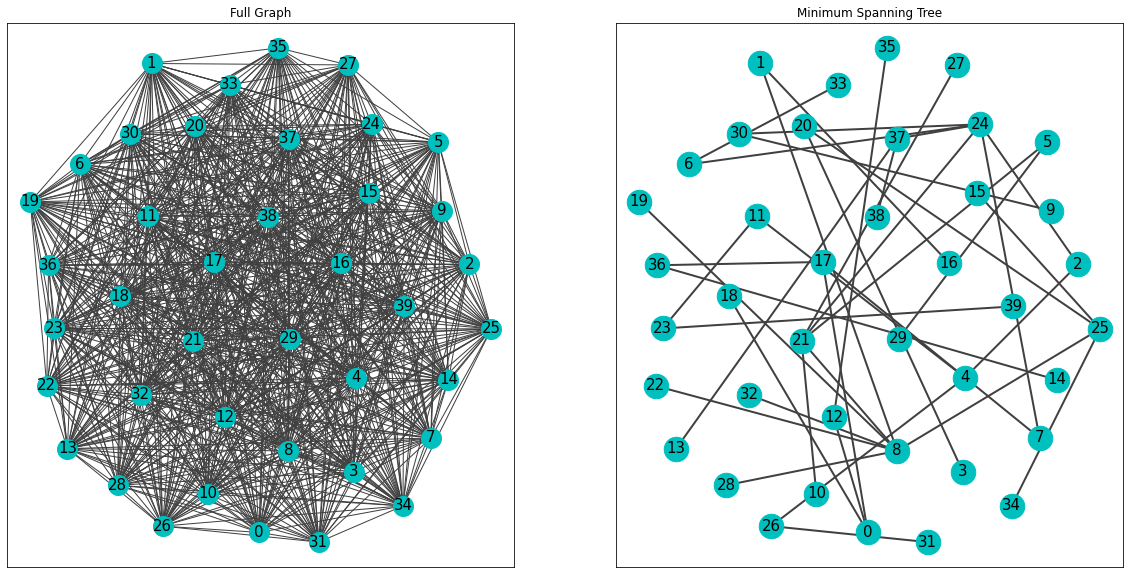

[(0, 'Accessories'),
 (1, 'Additives And Fluids'),
 (2, 'Biscuits And Wafer'),
 (3, 'Canisters'),
 (4, 'Cereals'),
 (5, 'Chewing Gum And Candy'),
 (6, 'Chips'),
 (7, 'Chocolates'),
 (8, 'Cigarettes'),
 (9, 'Coal'),
 (10, 'Cold Alcoholic Beverages'),
 (11, 'Condom'),
 (12, 'Covers'),
 (13, 'Dairy Products And Materials'),
 (14, 'Derivatives Peanuts'),
 (15, 'Diesel'),
 (16, 'Diesel Auto Clean'),
 (17, 'Energy'),
 (18, 'Ethanol'),
 (19, 'Extinguisher'),
 (20, 'Filters'),
 (21, 'Flavoring'),
 (22, 'Gasoline'),
 (23, 'Hot Alcoholic Beverages'),
 (24, 'Juices And Soft Drinks'),
 (25, 'Lubricant'),
 (26, 'Pastas'),
 (27, 'Personal Hygiene'),
 (28, 'Pickets'),
 (29, 'Popcorn'),
 (30, 'Popsicle And Ice Creams'),
 (31, 'Salted Biscuit'),
 (32, 'Several'),
 (33, 'Slippers'),
 (34, 'Special Diesel'),
 (35, 'Special Gasoline'),
 (36, 'Sweet Coconut James'),
 (37, 'The Bakery'),
 (38, 'Toys'),
 (39, 'Water')]

In [8]:
# Global variables
limit = None
labels, legend = make_labels(vectors, limit=limit)

# Make graphs 
corrmat = dfunc(np.array(vectors.corr()))
corrmat = corrmat[:limit, :limit] if limit else corrmat
G = nx.from_numpy_matrix(corrmat) # Graph
MST = nx.minimum_spanning_tree(G) # Minimum Spanning Tree

# Uniform layout for all plots to follow
pos = nx.spring_layout(G)

# Axes to draw on
nrows, ncols = 1,2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10*ncols, 10*nrows))

# Draw full graph
draw(G, pos, ax[0])
ax[0].set_title('Full Graph')

# Draw MST
draw(MST, pos, ax[1], node_size=600, width=2)
ax[1].set_title('Minimum Spanning Tree')

# Show
plt.show()

# Use to map numbers to products
legend

In [9]:
# Sort the edges by shortest values (i.e. closest relations)
E = [(a,b,c['weight']) for (a,b,c) in MST.edges(data=True)]
E = sorted(E, key=lambda x: x[2], reverse=False)
E2 = E[:5] # Top 5
E2

[(2, 6, 1.1600908323668389),
 (25, 39, 1.2363672347519596),
 (13, 15, 1.2365445336621768),
 (14, 15, 1.2874618112477618),
 (16, 29, 1.3082041150838402)]